In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import sem
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_rel, ttest_ind

In [3]:
%load_ext rpy2.ipython

from rpy2.robjects.packages import importr
# import R's "base" package
lme4 = importr('lme4')
optimx = importr('optimx')
pbkrtest = importr('pbkrtest')
lmerTest = importr('lmerTest')
ggplot = importr('ggplot2')
dplyr = importr('dplyr')
sjplot = importr('sjPlot')
car = importr('car')

C:\Users\dongj\anaconda3\envs\base37\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  "The symbol '%s' is not in this R namespace/package." % name


In [4]:
home_dir = 'G:\My Drive\\researches\\nyu\\road-construction-local-dk\data_online_2022\\'
# home_dir = 'G:\.shortcut-targets-by-id\\1sYZNVBbYCrHcHjo-9xdKcA4wLnob9ZEq\\road_construction\\data\\2022_online\\R_analysis_data\\'
map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
data_puzzle_level = data_puzzle_level.reset_index()
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID","condition"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')
# data_choice_level = data_choice_level.reset_index()
sc_data_choice_level = data_choice_level[data_choice_level['condition']==1].reset_index()


single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
# single_condition_data = single_condition_data.reset_index()

# When they started undo and stopped

In [5]:
sc_data_choice_level

,index,Unnamed: 0,subjects,puzzleID,trialID,allMAS,choice,currNumCities,currMas,currNos,...,lastUndo,submit,checkEnd,severityOfErrors,error,RT,undoRT,tortuosity,branching,branchingFirst
0,0,0,0,23,0,10,0,1,10,76,...,0,0,0,0,0,-1.0,-1.0,0.000000,True,True
1,1,1,0,23,0,10,21,2,10,52,...,0,0,0,0,0,4780.0,-1.0,1.000000,NaN,NaN
2,2,2,0,23,0,10,19,3,7,11,...,0,0,0,3,1,1830.0,-1.0,1.173193,NaN,NaN
3,3,3,0,23,0,10,5,4,6,10,...,0,0,0,1,1,1539.0,-1.0,1.442122,NaN,NaN
4,4,4,0,23,0,10,20,5,6,3,...,0,0,0,0,0,2015.0,-1.0,1.437794,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67928,112110,112110,99,34,91,10,12,7,10,1,...,0,0,0,0,0,3490.0,-1.0,1.499425,NaN,NaN
67929,112111,112111,99,34,91,10,7,8,10,1,...,0,0,0,0,0,1377.0,-1.0,1.758993,NaN,NaN
67930,112112,112112,99,34,91,10,23,9,10,1,...,0,0,0,0,0,1483.0,-1.0,2.399781,NaN,NaN
67931,112113,112113,99,34,91,10,27,10,10,1,...,0,0,1,0,0,1629.0,-1.0,4.766620,NaN,NaN


## Scatter plot

In [6]:
mas_map = [sc_data_choice_level.allMAS[sc_data_choice_level["puzzleID"]==i].tolist()[0] for i in np.unique(sc_data_choice_level['puzzleID'])]
str_ct = []
end_ct = []
str_ct_mean = []
end_ct_mean = []
for sub in range(101):
    str_ct_sbj = []
    end_ct_sbj = []
    dat_sbj  = sc_data_choice_level[sc_data_choice_level['subjects']==sub].sort_values(["puzzleID","index"])
    for pzi in np.unique(sc_data_choice_level['puzzleID']):
        dat_sbj_pzi = dat_sbj[dat_sbj['puzzleID'] == pzi].reset_index()
        str_ct_pz = []
        end_ct_pz = []
        
        for index in range(len(dat_sbj_pzi)):# or mas_map[pzi
#             print(dat_sbj_pzi.currNumCities[index])
            # -1: so that it can be ranged from 0 to 1
            if dat_sbj_pzi.firstUndo[index] == 1:
#                 if dat_sbj_pzi.currNumCities[index]+1-1 <= 0:
#                     print(dat_sbj_pzi.currNumCities[index])
                str_ct_pz.append((dat_sbj_pzi.currNumCities[index]+1-1)/(mas_map[pzi]-1)) # or datum.currMas
            if dat_sbj_pzi.lastUndo[index] == 1:
#                 if dat_sbj_pzi.currNumCities[index]-1 <= 0:
#                     print(dat_sbj_pzi.currNumCities[index])
                end_ct_pz.append((dat_sbj_pzi.currNumCities[index]-1)/(mas_map[pzi]-1))

            
                
        str_ct_sbj.extend(str_ct_pz)
        end_ct_sbj.extend(end_ct_pz)
    str_ct.extend(str_ct_sbj)
    end_ct.extend(end_ct_sbj)
    str_ct_mean.append(np.mean(str_ct_sbj))
    end_ct_mean.append(np.mean(end_ct_sbj))
    

C:\Users\dongj\anaconda3\envs\base37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\dongj\anaconda3\envs\base37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, color=[0,0,0])
    ax.set_xlabel('normalized number of cities connected (undo start)')
    ax.set_ylabel('normalized number of cities connected (undo target)')

    # now determine nice limits by hand:
    binwidth = 0.03
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, color=[.7,.7,.7])
    ax_histy.hist(y, bins=bins, orientation='horizontal', color=[.7,.7,.7])

In [8]:
end_ct_mean = np.array(end_ct_mean)
str_ct_mean = np.array(str_ct_mean)

str_ct_  = str_ct_mean[~np.isnan(str_ct_mean)]
end_ct_  = end_ct_mean[~np.isnan(end_ct_mean)]

# ind = np.argsort(str_ct_-end_ct_ )
ind = np.argsort(end_ct_ )

<IPython.core.display.Javascript object>


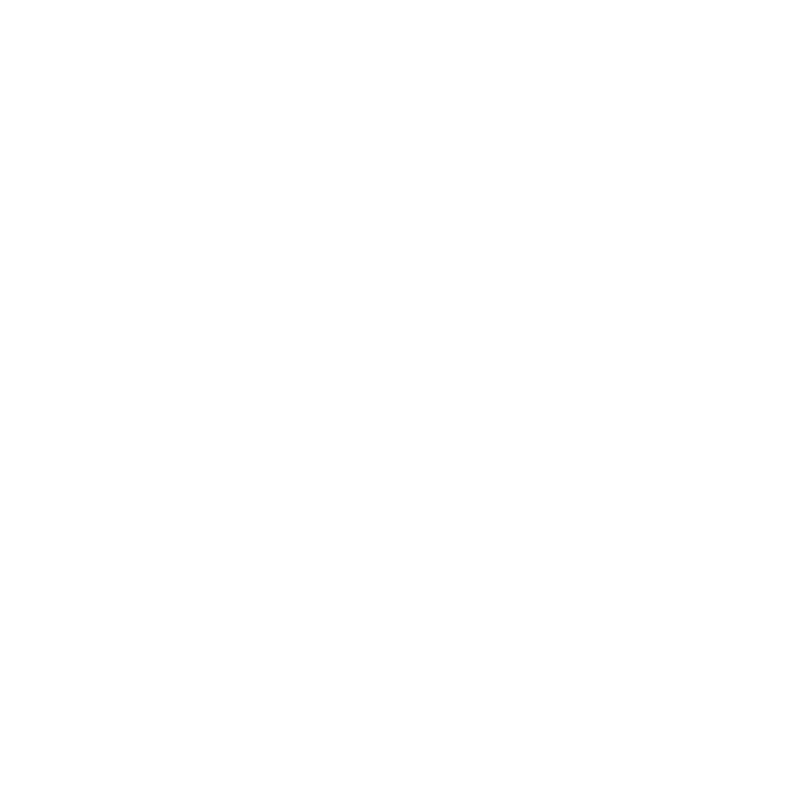

In [9]:
%matplotlib notebook
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)
offset_ = .05# offset for better visualization
ax.set_xlim(0,1+offset_)
ax.set_ylim(0,1+offset_)
ax_histx.set_xlim(0-offset_,1+offset_)
ax_histy.set_ylim(0-offset_,1+offset_)
# use the previously defined function
scatter_hist(str_ct_, end_ct_, ax, ax_histx, ax_histy)



<IPython.core.display.Javascript object>


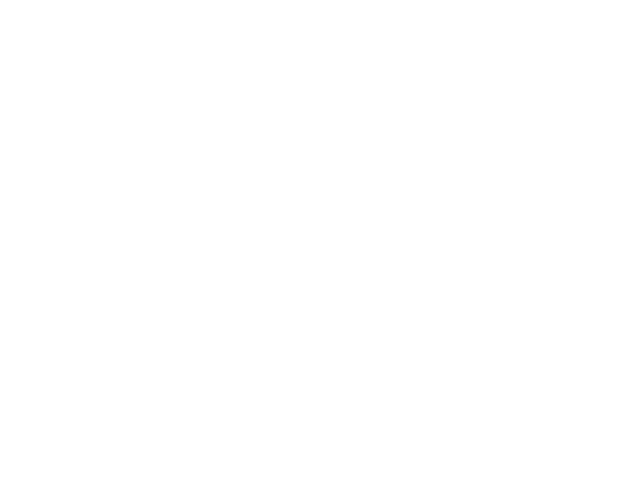

Text(0, 0.5, 'normalized number of cities connected (undo target)')

In [10]:
# only scatter plot
%matplotlib notebook
plt.scatter(str_ct_, end_ct_,color=[0,0,0])
plt.xlabel('normalized number of cities connected (undo start)')
plt.ylabel('normalized number of cities connected (undo target)')

## Scatter plot (every data points)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
x = np.random.randn(1000)
y = np.random.randn(1000)


def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, color=[0,0,0])
    ax.set_xlabel('normalized number of cities connected (undo start)')
    ax.set_ylabel('normalized number of cities connected (undo target)')

    # now determine nice limits by hand:
    binwidth = 0.03
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins, color=[.7,.7,.7])
    ax_histy.hist(y, bins=bins, orientation='horizontal', color=[.7,.7,.7])

In [12]:
end_ct = np.array(end_ct)
str_ct = np.array(str_ct)

str_ct = str_ct[~np.isnan(str_ct)]
end_ct = end_ct[~np.isnan(end_ct)]

# ind = np.argsort(str_ct - end_ct)
# ind = np.argsort(str_ct)
ind = np.argsort(end_ct)
#     plt.plot([str_ct[ind[i]], end_ct[ind[i]]], [i,i], 'k.--', linewidth=.1)

<IPython.core.display.Javascript object>


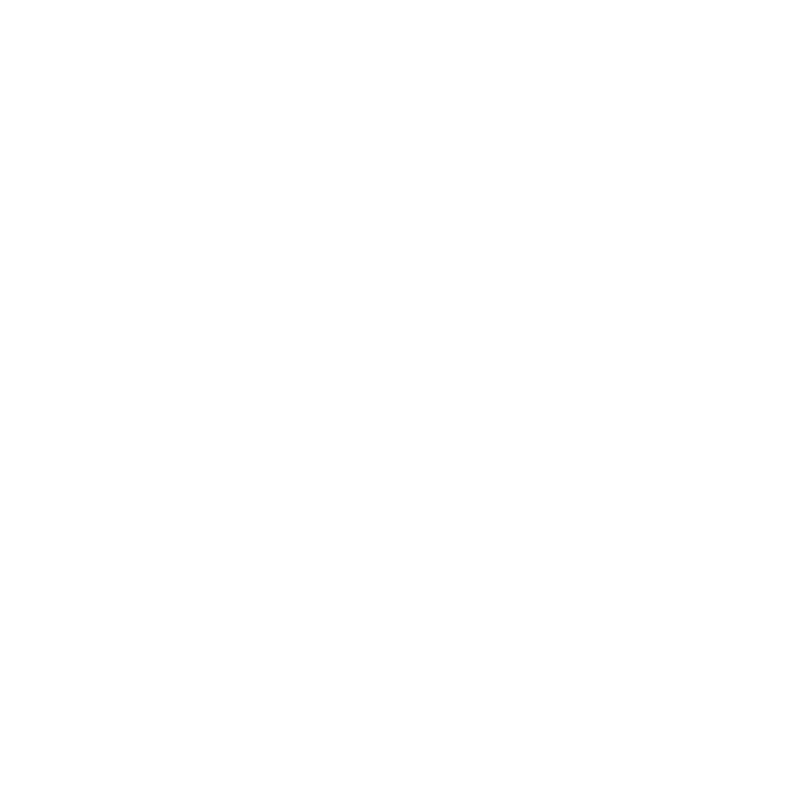

In [13]:
%matplotlib notebook
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)
offset_ = .05# offset for better visualization
ax.set_xlim(0,1+offset_)
ax.set_ylim(0,1+offset_)
ax_histx.set_xlim(0-offset_,1+offset_)
ax_histy.set_ylim(0-offset_,1+offset_)
# use the previously defined function
scatter_hist(str_ct, end_ct, ax, ax_histx, ax_histy)



<IPython.core.display.Javascript object>


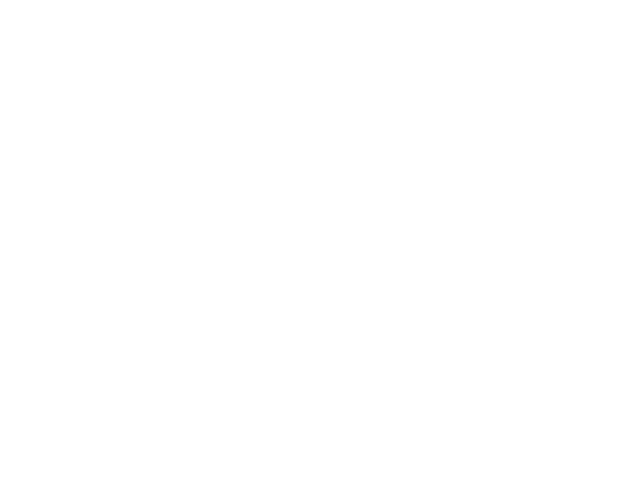

Text(0, 0.5, 'normalized number of cities connected (undo target)')

In [14]:
# only scatter plot
%matplotlib notebook
plt.scatter(str_ct, end_ct,color=[0,0,0])
plt.xlabel('normalized number of cities connected (undo start)')
plt.ylabel('normalized number of cities connected (undo target)')

# Undoing results in a different path?

## Results in the same city

In [15]:
undo_same_diff = []

for sub in range(101):
    dat_sbj  = sc_data_choice_level[sc_data_choice_level['subjects']==sub].sort_values(["puzzleID","index"])
    undo_same_diff_puzzle = []
    for pzi in np.unique(sc_data_choice_level['puzzleID']):
        same_puzzle = 0
        diff_puzzle = 0
        
        dat_sbj_pzi = dat_sbj[dat_sbj['puzzleID'] == pzi].reset_index()        

        firstUndo_idx = dat_sbj_pzi[dat_sbj_pzi["firstUndo"]==1].index
        path_bf_undo = dat_sbj_pzi["currMas"][firstUndo_idx-1]
        
        lastUndo_idx = dat_sbj_pzi[dat_sbj_pzi["lastUndo"]==1].index
        path_af_undo = dat_sbj_pzi["currMas"][lastUndo_idx+1]
        
        idxx = np.array(dat_sbj_pzi["choice"][lastUndo_idx-1]) != np.array(dat_sbj_pzi["choice"][lastUndo_idx+1])
        diff_puzzle += np.sum(idxx)
    
        idxx = np.array(dat_sbj_pzi["choice"][lastUndo_idx-1]) == np.array(dat_sbj_pzi["choice"][lastUndo_idx+1])
        same_puzzle += np.sum(idxx)
        
        undo_same_diff_puzzle.append([same_puzzle, diff_puzzle])
    undo_same_diff_puzzle =  np.array(undo_same_diff_puzzle)
    undo_same_diff_puzzle =  np.sum(undo_same_diff_puzzle,axis=0)

    undo_same_diff.append(undo_same_diff_puzzle)
    
undo_same_diff = np.array(undo_same_diff)

In [16]:
# exclude some never undoing subjects
undo_same_diff = undo_same_diff[np.where(np.sum(np.array(undo_same_diff),axis=1)!=0),:]
undo_same_diff = undo_same_diff.squeeze()
undo_same_diff_p = undo_same_diff/ np.sum(undo_same_diff,axis = 1)[:,None]

<IPython.core.display.Javascript object>


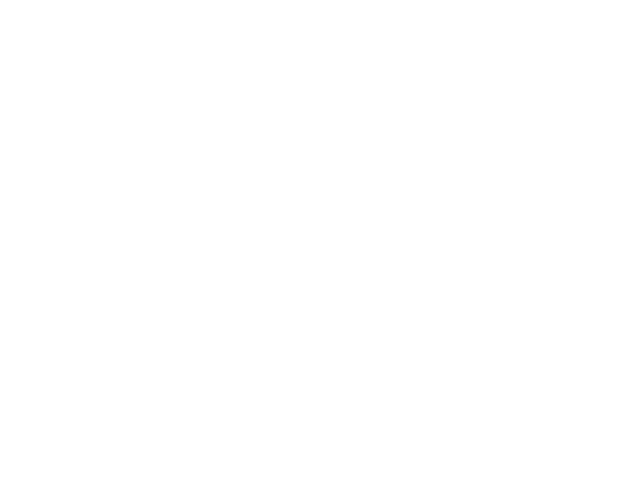

Text(0.5, 0, 'Next city after undoing')

In [17]:
%matplotlib notebook
plt.figure()
plt.bar(range(2), np.mean(undo_same_diff_p,axis=0),
        color=[.7,.7,.7], edgecolor = 'k', 
        yerr=np.std(undo_same_diff_p,axis = 0)/np.sqrt(undo_same_diff_p.shape[0]))
plt.xticks([0,1], ['different','same'])
plt.xlabel('Next city after undoing')

## Results in same path?

In [18]:
undo_for_better = []

for sub in range(101):
    dat_sbj  = sc_data_choice_level[sc_data_choice_level['subjects']==sub].sort_values(["puzzleID","index"])
    undo_for_puzzle = []
    for pzi in np.unique(sc_data_choice_level['puzzleID']):
        dat_sbj_pzi = dat_sbj[dat_sbj['puzzleID'] == pzi].reset_index()           

        firstUndo_idx_ = dat_sbj_pzi[dat_sbj_pzi["firstUndo"]==1].index
        firstUndo_idx_ = firstUndo_idx_.to_list()
#         firstUndo_idx_ = (firstUndo_idx_ - 1).to_list()

        lastUndo_idx = dat_sbj_pzi[dat_sbj_pzi["lastUndo"]==1].index
        lastUndo_idx = lastUndo_idx.to_list()

        submit_idx = dat_sbj_pzi[dat_sbj_pzi["submit"]==1].index
        submit_idx = submit_idx.to_list()

        lastUndo_idx_ = [0]
        lastUndo_idx_.extend(lastUndo_idx)
        firstUndo_idx = submit_idx.copy()
        firstUndo_idx_.extend(firstUndo_idx)
        
        
        for tr in range(len(firstUndo_idx_)-1):
            Prev_seq = dat_sbj_pzi['choice'][lastUndo_idx_[tr]:firstUndo_idx_[tr]].to_list()
            Curr_seq = dat_sbj_pzi['choice'][lastUndo_idx_[tr+1]:firstUndo_idx_[tr+1]].to_list()
#             print('*'*10)
#             print(tr)
#             print(Prev_seq)
#             print(Curr_seq)
#             print('*'*10)
#             print(Prev_seq)
#             print(Curr_seq)
            undo_target = Curr_seq[0]
#             print(undo_target)
            # if a participant undid more than the length of the previous undoing sequence
            if dat_sbj_pzi['currNumCities'][lastUndo_idx_[tr]]>dat_sbj_pzi['currNumCities'][lastUndo_idx_[tr+1]]: 
                # then it is simply whether the previous undoing sequence is in the current undoing sequence
                if np.all(np.isin(Prev_seq, Curr_seq)):
                    undo_for_puzzle.append(1)
                else:
                    undo_for_puzzle.append(0)
            else:
                # first find undo target
                undo_target = Curr_seq[0]
                Prev_seq_temp = Prev_seq[np.argwhere(np.array(Prev_seq)==undo_target).squeeze():]
                len_frag = min(len(Prev_seq_temp), len(Curr_seq))
                Prev_seq_temp = Prev_seq_temp[:len_frag]
                Curr_seq_temp = Curr_seq[:len_frag]

                if np.all(Prev_seq_temp==Curr_seq_temp):
                    undo_for_puzzle.append(1)
                else:
                    undo_for_puzzle.append(0)
#             print('hup')
    undo_for_puzzle =  np.array(undo_for_puzzle)
    undo_for_better.append([np.sum(undo_for_puzzle==0), np.sum(undo_for_puzzle==1)])
undo_for_better = np.array(undo_for_better)

In [19]:
# exclude some never undoing subjects
undo_for_better = undo_for_better[np.where(np.sum(np.array(undo_for_better),axis=1)!=0),:]
undo_for_better = undo_for_better.squeeze()
undo_for_better_p = undo_for_better/ np.sum(undo_for_better,axis = 1)[:,None]

<IPython.core.display.Javascript object>


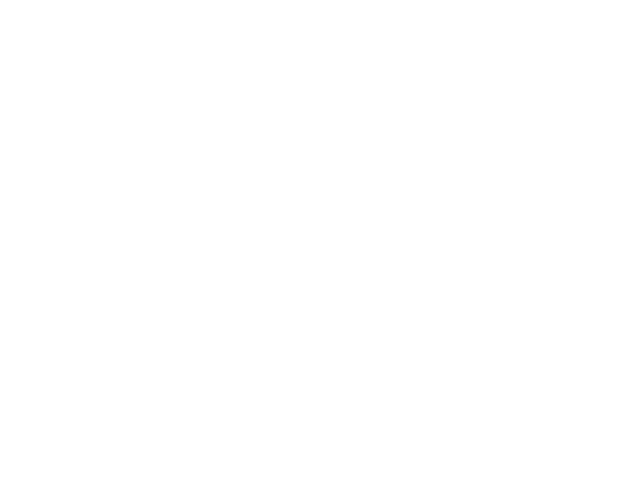

Text(0.5, 0, 'Next path after undoing')

In [20]:
%matplotlib notebook
plt.figure()
plt.bar(range(2), np.mean(undo_same_diff_p,axis=0),
        color=[.7,.7,.7], edgecolor = 'k', 
        yerr=np.std(undo_same_diff_p,axis = 0)/np.sqrt(undo_same_diff_p.shape[0]))
plt.xticks([0,1], ['different','same'])
plt.xlabel('Next path after undoing')

# After an undo or sequence of undos, how often do people actually choose a better move?! 

## city bf/af undoing

After undoing, until either undo again or submit
Or the first move after undoing 

### for different paths 

In [21]:
undo_for_better = []

for sub in range(101):
    dat_sbj  = sc_data_choice_level[sc_data_choice_level['subjects']==sub].sort_values(["puzzleID","index"])
    undo_for_puzzle = []
    for pzi in np.unique(sc_data_choice_level['puzzleID']):
        dat_sbj_pzi = dat_sbj[dat_sbj['puzzleID'] == pzi].reset_index()        

        firstUndo_idx = dat_sbj_pzi[dat_sbj_pzi["firstUndo"]==1].index
        path_bf_undo = dat_sbj_pzi["currMas"][firstUndo_idx-1]
        
        lastUndo_idx = dat_sbj_pzi[dat_sbj_pzi["lastUndo"]==1].index
        path_af_undo = dat_sbj_pzi["currMas"][lastUndo_idx+1]
        
        # only after undoing to a different path 
        if np.any(np.array(dat_sbj_pzi["choice"][lastUndo_idx-1]) != np.array(dat_sbj_pzi["choice"][lastUndo_idx+1])):
            idxx = np.array(dat_sbj_pzi["choice"][lastUndo_idx-1]) != np.array(dat_sbj_pzi["choice"][lastUndo_idx+1])
            undo_for_puzzle.extend(np.sign(np.array(path_af_undo[idxx]) - np.array(path_bf_undo[idxx])))
#         else:
#             print('hup')
    undo_for_puzzle =  np.array(undo_for_puzzle)
    undo_for_better.append([np.sum(undo_for_puzzle<0), np.sum(undo_for_puzzle==0) ,np.sum(undo_for_puzzle>0)])
undo_for_better = np.array(undo_for_better)

In [22]:
# exclude some never undoing subjects
undo_for_better = undo_for_better[np.where(np.sum(np.array(undo_for_better),axis=1)!=0),:]
undo_for_better = undo_for_better.squeeze()
undo_for_better_p = undo_for_better/ np.sum(undo_for_better,axis = 1)[:,None]

<IPython.core.display.Javascript object>


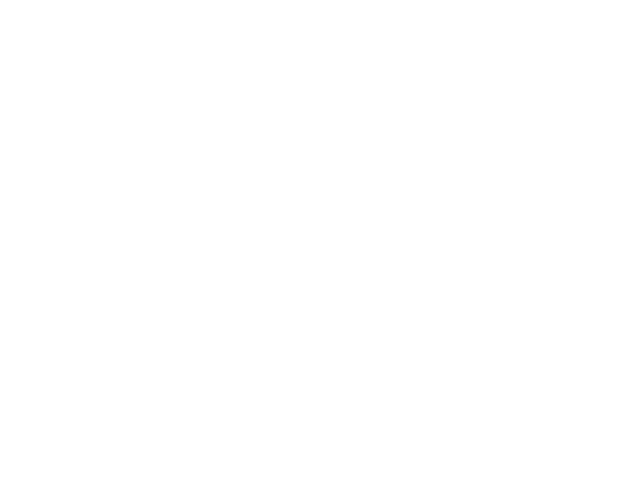

Text(0.5, 0, 'After undoing')

In [23]:
%matplotlib notebook
plt.figure()
plt.bar(range(3), np.mean(undo_for_better_p,axis=0),
        color=[.7,.7,.7], edgecolor = 'k', 
        yerr=np.std(undo_for_better_p,axis = 0)/np.sqrt(undo_for_better_p.shape[0]))
plt.xticks([0,1,2], ['worse','no_diff','better'])
plt.xlabel('After undoing')

### including undoing to the same paths

In [24]:
undo_for_better = []

for sub in range(101):
    dat_sbj  = sc_data_choice_level[sc_data_choice_level['subjects']==sub].sort_values(["puzzleID","index"])
    undo_for_puzzle = []
    for pzi in np.unique(sc_data_choice_level['puzzleID']):
        dat_sbj_pzi = dat_sbj[dat_sbj['puzzleID'] == pzi].reset_index()        

        firstUndo_idx = dat_sbj_pzi[dat_sbj_pzi["firstUndo"]==1].index
        path_bf_undo = dat_sbj_pzi["currMas"][firstUndo_idx-1]
        
        lastUndo_idx = dat_sbj_pzi[dat_sbj_pzi["lastUndo"]==1].index
        path_af_undo = dat_sbj_pzi["currMas"][lastUndo_idx+1]
        
        # only after undoing to a different path 
#         if np.any(np.array(dat_sbj_pzi["choice"][lastUndo_idx-1]) != np.array(dat_sbj_pzi["choice"][lastUndo_idx+1])):
#             idxx = np.array(dat_sbj_pzi["choice"][lastUndo_idx-1]) != np.array(dat_sbj_pzi["choice"][lastUndo_idx+1])
        undo_for_puzzle.extend(np.sign(np.array(path_af_undo) - np.array(path_bf_undo)))
#         else:
#             print('hup')
    undo_for_puzzle =  np.array(undo_for_puzzle)
    undo_for_better.append([np.sum(undo_for_puzzle<0), np.sum(undo_for_puzzle==0) ,np.sum(undo_for_puzzle>0)])
undo_for_better = np.array(undo_for_better)

In [25]:
# exclude some never undoing subjects
undo_for_better = undo_for_better[np.where(np.sum(np.array(undo_for_better),axis=1)!=0),:]
undo_for_better = undo_for_better.squeeze()
undo_for_better_p = undo_for_better/ np.sum(undo_for_better,axis = 1)[:,None]

<IPython.core.display.Javascript object>


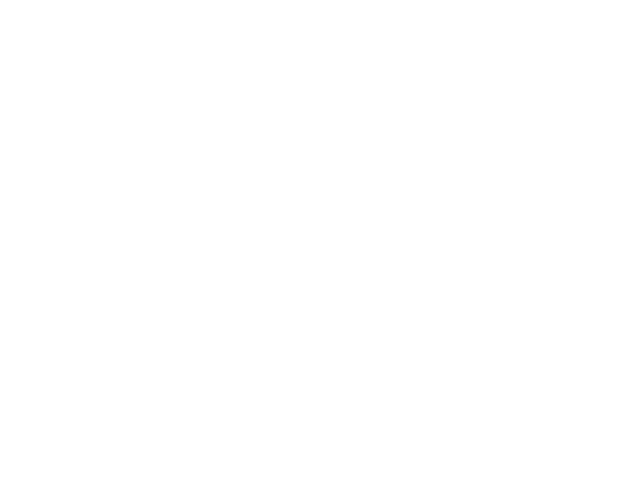

Text(0.5, 0, 'After undoing')

In [26]:
%matplotlib notebook
plt.figure()
plt.bar(range(3), np.mean(undo_for_better_p,axis=0),
        color=[.7,.7,.7], edgecolor = 'k', 
        yerr=np.std(undo_for_better_p,axis = 0)/np.sqrt(undo_for_better_p.shape[0]))
plt.xticks([0,1,2], ['worse','no_diff','better'])
plt.xlabel('After undoing')

## leaf node bf/af undoing

### only for the different path

In [27]:
# do we need?

### Including going to the same path

In [28]:
undo_for_better = []

for sub in range(101):
    dat_sbj  = sc_data_choice_level[sc_data_choice_level['subjects']==sub].sort_values(["puzzleID","index"])
    undo_for_puzzle = []
    for pzi in np.unique(sc_data_choice_level['puzzleID']):
        dat_sbj_pzi = dat_sbj[dat_sbj['puzzleID'] == pzi].reset_index()        

        firstUndo_idx = dat_sbj_pzi[dat_sbj_pzi["firstUndo"]==1].index
        path_bf_undo = dat_sbj_pzi["currMas"][firstUndo_idx-1]
        firstUndo_idx = firstUndo_idx.to_list()
        
        submit_idx = dat_sbj_pzi[dat_sbj_pzi["submit"]==1].index
        submit_idx = submit_idx.to_list()
        firstUndo_idx.extend(submit_idx) 
        for i in range(len(firstUndo_idx)-1):
            undo_for_puzzle.append(dat_sbj_pzi["currMas"][firstUndo_idx[i+1]-1] - dat_sbj_pzi["currMas"][firstUndo_idx[i]-1])
    
        
        
#             print('hup')
    undo_for_puzzle =  np.array(undo_for_puzzle)
    undo_for_better.append([np.sum(undo_for_puzzle<0), np.sum(undo_for_puzzle==0) ,np.sum(undo_for_puzzle>0)])
undo_for_better = np.array(undo_for_better)

In [29]:
# exclude some never undoing subjects
undo_for_better = undo_for_better[np.where(np.sum(np.array(undo_for_better),axis=1)!=0),:]
undo_for_better = undo_for_better.squeeze()
undo_for_better_p = undo_for_better/ np.sum(undo_for_better,axis = 1)[:,None]

<IPython.core.display.Javascript object>


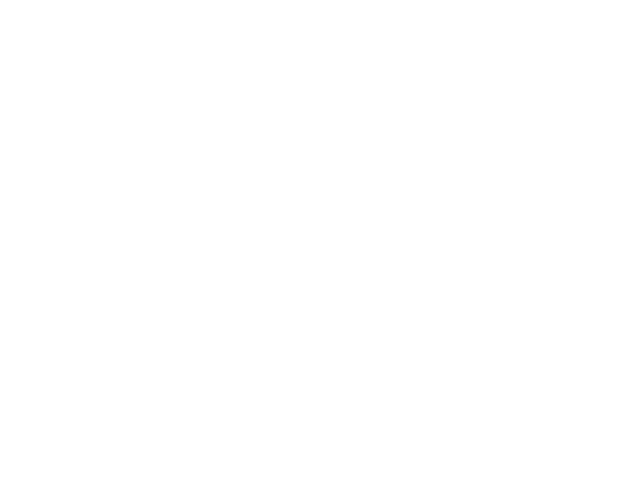

Text(0.5, 0, 'After undoing')

In [30]:
%matplotlib notebook
plt.figure()
plt.bar(range(3), np.mean(undo_for_better_p,axis=0),
        color=[.7,.7,.7], edgecolor = 'k', 
        yerr=np.std(undo_for_better_p,axis = 0)/np.sqrt(undo_for_better_p.shape[0]))
plt.xticks([0,1,2], ['worse','no_diff','better'])
plt.xlabel('After undoing')

# One undo is enough?

In [31]:
data_puzzle_order = data_puzzle_level.sort_values(["subjects","puzzleID"])

In [32]:
data_puzzle_undo = data_puzzle_order[data_puzzle_order["condition"]==1]
data_puzzle_basic = data_puzzle_order[data_puzzle_order["condition"]==0]

In [33]:
benefit_undo = []
numundo_undo = []
for sub in range(101):
    si = sub+1
    n_undo = data_puzzle_undo[data_puzzle_undo['subjects']==si]
    n_basic = data_puzzle_basic[data_puzzle_basic['subjects']==si]
    
    benefit_undo.append(np.array(n_undo['numCities']) - np.array(n_basic['numCities']) )
    numundo_undo.append(np.array(n_undo['numFullUndo']))
    

In [34]:
benefit_undo = np.array(benefit_undo)
benefit_undo_f = benefit_undo.reshape(-1)
numundo_undo = np.array(numundo_undo)
numundo_undo_f = numundo_undo.reshape(-1)

In [35]:
numundo_undo_f3 = np.zeros(numundo_undo_f.shape)

numundo_undo_f3[numundo_undo_f == 1] = 1
numundo_undo_f3[numundo_undo_f == 2] = 2
numundo_undo_f3[numundo_undo_f == 3] = 3
numundo_undo_f3[numundo_undo_f >  3] = 4
numundo_undo_f3 = numundo_undo_f3.astype(np.int)
ddata = [benefit_undo_f[numundo_undo_f3 == i] for i in [0,1,2,3,4]]

C:\Users\dongj\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


<IPython.core.display.Javascript object>


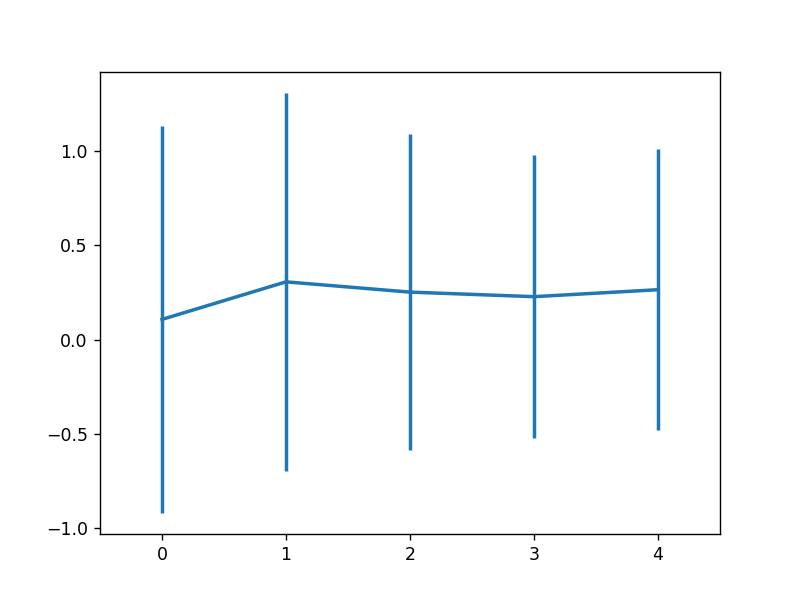

In [44]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
mean_ = []
std_ = []
for i in [0,1,2,3,4]:
    temp = benefit_undo_f[numundo_undo_f3 == i]
#     axs.scatter(.4*(np.random.rand(temp.shape[0])-.5)+i, temp, c='k')
#     axs.hlines(y = temp.mean(), xmin=i-0.2, xmax=i+0.2, colors='r', linewidth = 4) 
    mean_.append(temp.mean())
    std_.append(temp.std())

# axs.plot(mean_, 'r',yerr=std_ ,linewidth = 2)
axs.errorbar([0,1,2,3,4], mean_, yerr=std_ ,linewidth = 2)
axs.set_xlim(-.5, 4.5)
axs.set_xticks([0,1,2,3,4])



In [37]:
from scipy.stats import ttest_ind

print(ttest_ind(benefit_undo_f[numundo_undo_f3 == 0],benefit_undo_f[numundo_undo_f3 == 1]))

print(ttest_ind(benefit_undo_f[numundo_undo_f3 == 2],benefit_undo_f[numundo_undo_f3 == 1]))

print(ttest_ind(benefit_undo_f[numundo_undo_f3 == 3],benefit_undo_f[numundo_undo_f3 == 1]))


Ttest_indResult(statistic=-5.072394104849493, pvalue=4.103997604597092e-07)
Ttest_indResult(statistic=-0.8276510463614605, pvalue=0.4080409143476531)
Ttest_indResult(statistic=-0.902739713268135, pvalue=0.3668810114627832)


<IPython.core.display.Javascript object>


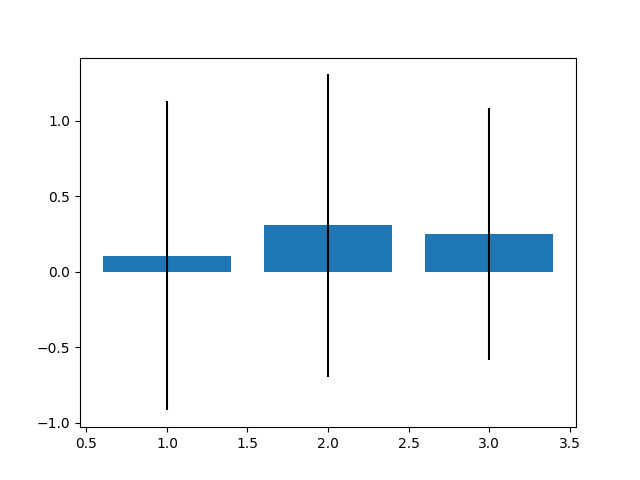

<BarContainer object of 3 artists>

In [38]:
%matplotlib notebook

fig, axs = plt.subplots(1, 1)
axs.bar([1,2,3],[benefit_undo_f[numundo_undo_f3 == i].mean() for i in [0,1,2]]
        ,yerr=[benefit_undo_f[numundo_undo_f3 == i].std() for i in [0,1,2]])

# benefit of undo

In [47]:
basic_score = puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities'].reset_index(drop=True)
basic_score_z = basic_score/puzzleID_order_data[puzzleID_order_data['condition']==0]['mas'].reset_index(drop=True)
single_condition_data['numCities_z'] = single_condition_data['numCities']/single_condition_data['mas']

single_condition_data['undo_benefit'] = single_condition_data['numCities'] - basic_score
single_condition_data['undo_benefit_z'] = single_condition_data['numCities_z'] - basic_score_z

undo_benefit_sub = single_condition_data.groupby(['subjects'])['undo_benefit'].mean()
undo_count_sub = single_condition_data.groupby(['subjects'])['numFullUndo'].mean()

benefit_undo = (np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numCities']) 
        - np.array(puzzleID_order_data[puzzleID_order_data['condition']==0]['numCities']))

undo_count = np.array(puzzleID_order_data[puzzleID_order_data['condition']==1]['numFullUndo'])


In [64]:
print(np.array([np.unique(benefit_undo).tolist(), [np.sum(benefit_undo==i) for i in np.unique(benefit_undo)]] ))

[[  -5   -4   -3   -2   -1    0    1    2    3    4    5    6]
 [   1    7   40  122  653 2501  971  257   68   20    3    3]]


In [63]:
print(np.array([np.unique(undo_count).tolist(), [np.sum(undo_count==i) for i in np.unique(undo_count)]] ))

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   16]
 [3201  859  286  145   72   31   14   17   10    3    2    3    2    1]]


In [71]:
num_set = [0,1,2]
print(np.array([num_set,
    [np.sum(undo_count==num_set[0]), np.sum(undo_count==num_set[1]), np.sum(undo_count>=num_set[2])  ]] ))

[[   0    1    2]
 [3201  859  586]]


In [74]:
undo_count[undo_count>=2] = 2

In [78]:

yerr = stats.binned_statistic(undo_count, benefit_undo, statistic=lambda y: np.std(y)/np.sqrt(len(y)), bins=[0,1,2,100])
bins = stats.binned_statistic(undo_count, benefit_undo, 'mean', bins=[0,1,2,100])

In [85]:
yerr

BinnedStatisticResult(statistic=array([0.01813615, 0.03414889, 0.03271935]), bin_edges=array([  0.,   1.,   2., 100.]), binnumber=array([2, 3, 2, ..., 1, 2, 2], dtype=int64))

<IPython.core.display.Javascript object>


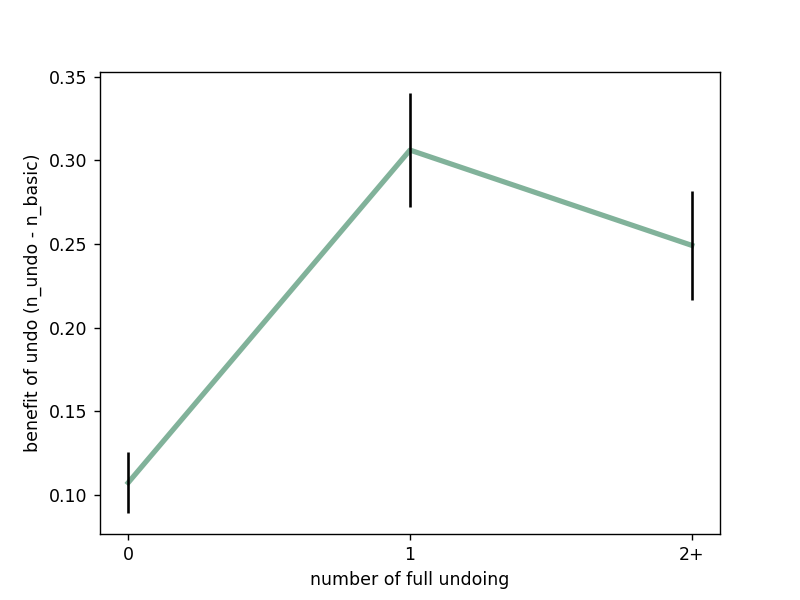

In [87]:
fig, axs = plt.subplots()         
axs.plot(bins[1][:-1], bins[0], color = '#81b29a', linewidth=3)
plotline1, caplines1, barlinecols1 = axs.errorbar(bins[1][:-1], bins[0], yerr[0], capsize = 0, ls='None', color='k')

# non-parametric version of anova (because number of observations is different: https://www.reneshbedre.com/blog/anova.html)
# Kruskal-Wallis Test
stat1, p1 = stats.kruskal(benefit_undo[undo_count==1], benefit_undo[undo_count==2], benefit_undo[undo_count==3],benefit_undo[undo_count>=4])
x1, x2 = 1,2  
y, h, col = bins[0][1] + 0.1, 0, 'k'
# axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# text(p1)

stat2, p2 = stats.kruskal(benefit_undo[undo_count==0], benefit_undo[undo_count==1], benefit_undo[undo_count==2], benefit_undo[undo_count==3],benefit_undo[undo_count>=4])
x1, x2 = 0,2
y, h, col = bins[0][1] + 0.05, 0, 'k'
# axs.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# text(p2)

axs.set_xticks([0,1,2])
axs.set_xticklabels([0,1,'2+'])
axs.set_xlabel('number of full undoing')
axs.set_ylabel('benefit of undo (n_undo - n_basic)')
fig.savefig(out_dir + 'undobenefit_undonum.png', dpi=600, bbox_inches='tight')

#  Cumulative error

# Other features of undo target / undo starting state

# To be deleted

## from 1.

### start--undo per subject

In [84]:
end_ct_mean = np.array(end_ct_mean)
str_ct_mean = np.array(str_ct_mean)

str_ct_  = str_ct_mean[~np.isnan(str_ct_mean)]
end_ct_  = end_ct_mean[~np.isnan(end_ct_mean)]

# ind = np.argsort(str_ct_-end_ct_ )
ind = np.argsort(end_ct_ )

<IPython.core.display.Javascript object>


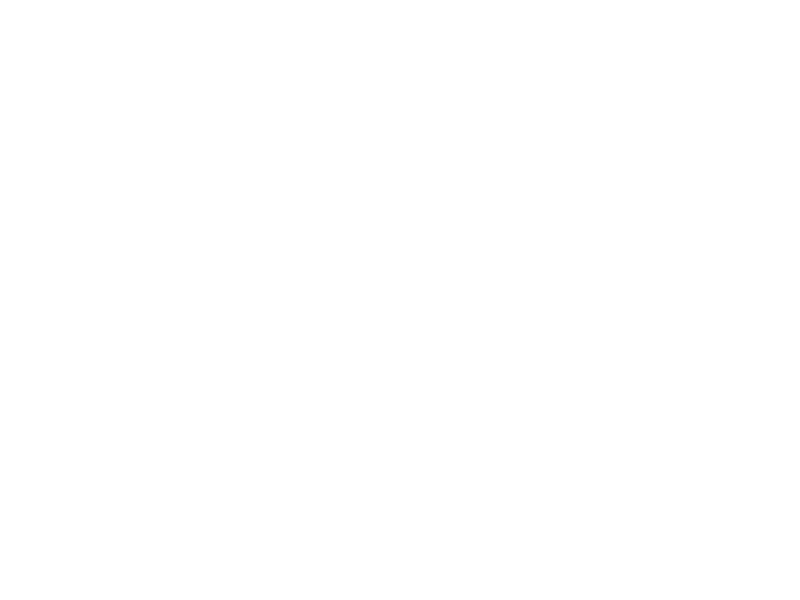

Text(0, 0.5, 'participant')

In [85]:
%matplotlib notebook
for i in range(len(str_ct_)):
    plt.plot([str_ct_[ind[i]], end_ct_[ind[i]]], [i,i], 'kx--')
plt.xlabel('normalized num cities connected')
plt.ylabel('participant')

### start--undo per every data point

In [86]:
end_ct = np.array(end_ct)
str_ct = np.array(str_ct)

str_ct = str_ct[~np.isnan(str_ct)]
end_ct = end_ct[~np.isnan(end_ct)]

# ind = np.argsort(str_ct - end_ct)
# ind = np.argsort(str_ct)
ind = np.argsort(end_ct)

<IPython.core.display.Javascript object>


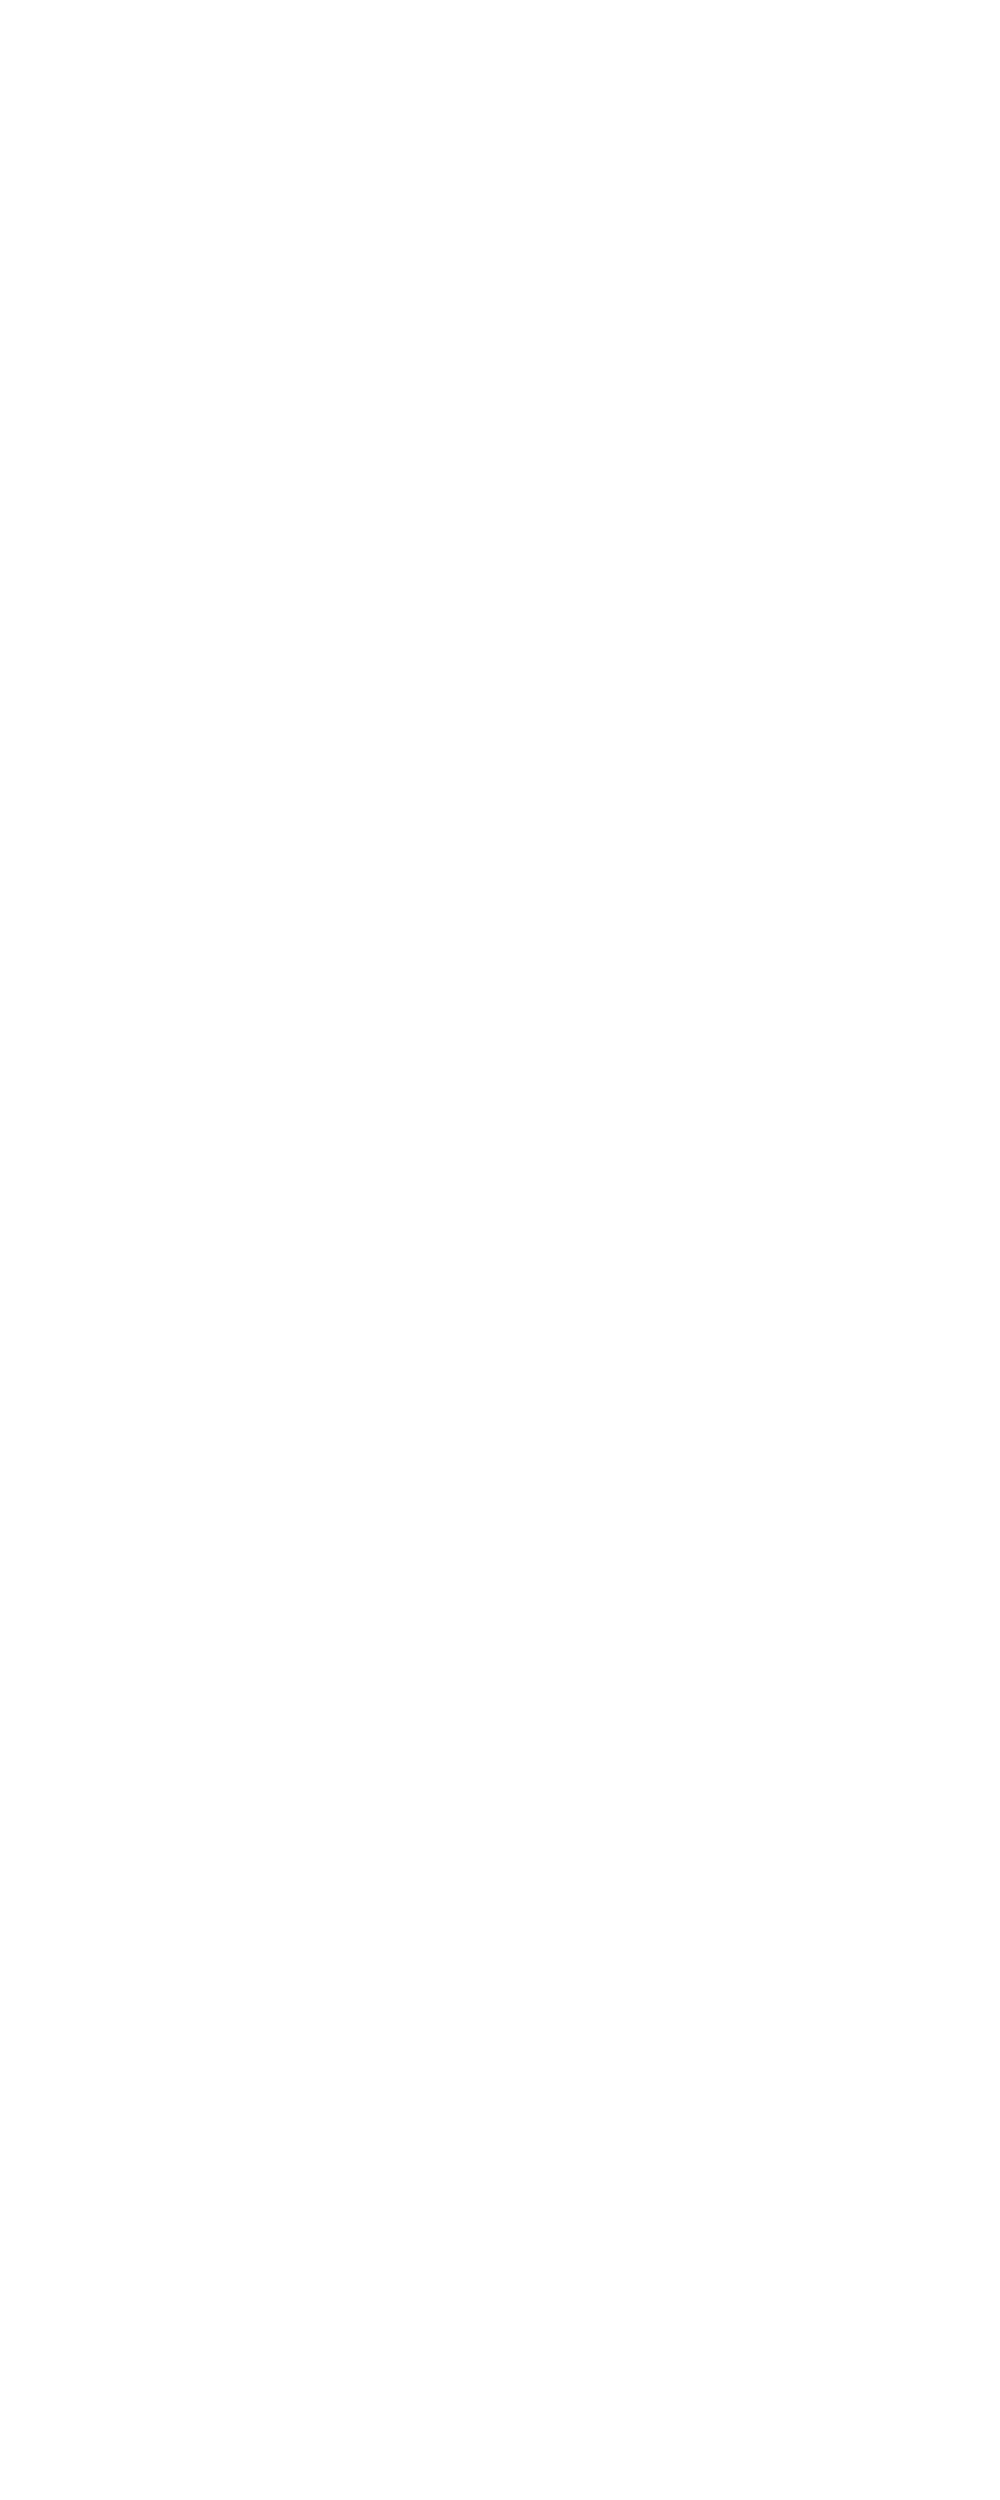

In [87]:
%matplotlib notebook
plt.figure(figsize=(4, 10), dpi=200)
for i in range(len(str_ct)):
    plt.plot([str_ct[ind[i]], end_ct[ind[i]]], [i,i], 'k.--', linewidth=.1)

### Histogram

In [88]:
%matplotlib notebook
plt.hist(str_ct_, alpha=0.5)
plt.hist(end_ct_, alpha=0.5)
plt.legend(['undo_start','undo_target'])
plt.xlabel('normalized num cities connected')


<IPython.core.display.Javascript object>

Text(0.5, 0, 'normalized num cities connected')